<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ingest-Earthquake-and-Fracking-Data" data-toc-modified-id="Ingest-Earthquake-and-Fracking-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ingest Earthquake and Fracking Data</a></span></li><li><span><a href="#Map-Visualization-with-GeoPandas" data-toc-modified-id="Map-Visualization-with-GeoPandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Map Visualization with GeoPandas</a></span></li><li><span><a href="#Layering-the-Data" data-toc-modified-id="Layering-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Layering the Data</a></span><ul class="toc-item"><li><span><a href="#Base-Map" data-toc-modified-id="Base-Map-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Base Map</a></span></li><li><span><a href="#Fracking-Sites" data-toc-modified-id="Fracking-Sites-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fracking Sites</a></span></li><li><span><a href="#Earthquakes" data-toc-modified-id="Earthquakes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Earthquakes</a></span></li><li><span><a href="#Faults" data-toc-modified-id="Faults-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Faults</a></span></li></ul></li><li><span><a href="#Map-Visualization-With-Folium" data-toc-modified-id="Map-Visualization-With-Folium-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Map Visualization With Folium</a></span><ul class="toc-item"><li><span><a href="#Basic-Map" data-toc-modified-id="Basic-Map-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Basic Map</a></span></li><li><span><a href="#Layers" data-toc-modified-id="Layers-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Layers</a></span></li></ul></li></ul></div>

In [5]:
# Imports
import geopandas as gp
import pandas as pd
import os

In [6]:
import matplotlib.pyplot as plt
import shapely

In [7]:
#Tutorials
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#https://automating-gis-processes.github.io/2017/index.html  

#State map files for the US
#https://eric.clst.org/tech/usgeojson/
    
#Oklahoma-specific maps and layers
#https://okmaps.org/OGI/search.aspx

#Complex pyplot ops:
#https://www.python-course.eu/matplotlib_subplots.php

In [8]:
# Display options
%matplotlib inline

## Ingest Earthquake and Fracking Data

In [9]:
file_path = os.path.join ('.', 'data', 'earthquakes.pkl')
edf = pd.read_pickle(file_path)

file_path = os.path.join ('.', 'data', 'fracking.pkl')
fdf = pd.read_pickle(file_path)

In [10]:
edf.head(1)

,time,lat,long,depth,mag,place,day,month,year,type,days_since_1900
0,2021-07-22 09:23:17.010000+00:00,35.121833,-95.34,7.55,3.34,"2 km E of Quinton, Oklahoma",22,7,2021,quake,44397


In [11]:
fdf.head(1)

,STATUS,MAXPRESSUR,MAXRATE,lat,long
0,AC,300,300,36.989739,-102.5956


## Map Visualization with GeoPandas

GeoPandas is an overlay to Pandas (and by extension MatPlotLib).   It uses Shapely object specifications to characterize geometric features.   Shapely is an implementation of the GEOS library that serves as the geometry engine of PostgreSQL and widely used in the GIS community.  https://shapely.readthedocs.io/en/stable/manual.html.   Shapely allows characterization of primitive geometric shapes, grouping of those shapes, relationships among shapes (distance, etc.) and set-theoretic operations (ovelaps, etc.)  Many shapely objects can be converted to Numpy arrays.

GeoPandas has its own "geometry-centric" version of a pandas.DataFrame, known as a geopandas.GeoDataFrame.   The latter embeds a "geometry" column - that's what's used for geolocation within the local GeoDataFrame and the common unit of analysis among different layers one might included in the final product.

In [32]:
# Ingest and set Coordinate Reference System (crs) to WGS84 latitude-longitude
#   Mercator is "EPSG:3395"

Here, we convert the earthquakes DataFrame to the GeoDataFrame using latitute/longitude to construct the geometry:

In [33]:
# Earthquakes
eq_geo = gp.GeoDataFrame(edf, geometry=gp.points_from_xy(edf.long, edf.lat))
eq_geo = eq_geo.set_crs("EPSG:4326")
eq_geo.head(1)

,time,lat,long,depth,mag,place,day,month,year,type,days_since_1900,geometry
0,2021-07-22 09:23:17.010000+00:00,35.121833,-95.34,7.55,3.34,"2 km E of Quinton, Oklahoma",22,7,2021,quake,44397,POINT (-95.34000 35.12183)


Here is the fracking data, again with the latitude/longitude converted to a geometry column:

In [34]:
# Fracking
fr_geo = gp.GeoDataFrame(fdf, geometry=gp.points_from_xy(fdf.long, fdf.lat))
fr_geo = fr_geo.set_crs("EPSG:4326")
fr_geo.head(1)

,STATUS,MAXPRESSUR,MAXRATE,lat,long,geometry
0,AC,300,300,36.989739,-102.5956,POINT (-102.59560 36.98974)


In [35]:
#gp.read_file() returns a GeoDataFrame based on a *.shp file

file_path = os.path.join ('.', 'data', 'County_Boundaries.shp')
ok_county_map = okm = gp.read_file(file_path)
okm[['SHAPE_Leng', 'SHAPE_Area', 'geometry']].head(1)

,SHAPE_Leng,SHAPE_Area,geometry
0,2.105773,0.180609,"POLYGON ((-96.62285 36.04707, -96.62286 36.046..."


In [36]:
# Faults
file_path = os.path.join ('.', 'data', 'faultdb_ver2.shp')
fault_df = gp.read_file(file_path)
fault_df.head(1)

,id,quality,shortref,reference,formtop,formbottom,dipdirecti,name,geometry
0,1,D,Harlton (1964),"Harlton, B.H., 1964, Tectonic Framework of Eol...",None,None,None,None,"LINESTRING (676591.249 -55827.593, 676711.911 ..."


In [37]:
# This ensures layers align
fr_geo = fr_geo.to_crs(okm.crs)
eq_geo = eq_geo.to_crs(okm.crs)
fault_df = fault_df.to_crs(okm.crs)

## Layering the Data

### Base Map

<AxesSubplot:>

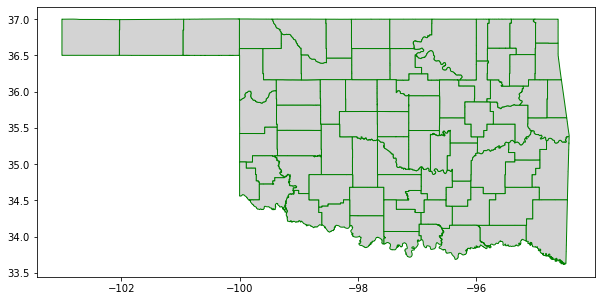

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

okm.plot(ax=ax, color='lightgray', edgecolor='green')

### Fracking Sites

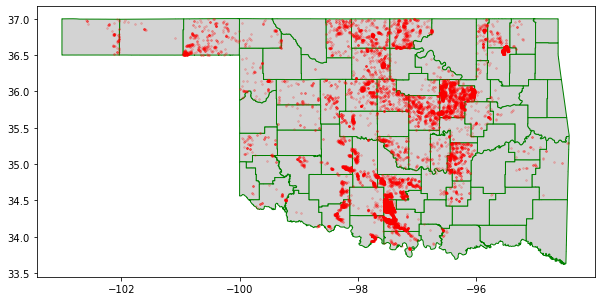

<Figure size 432x288 with 0 Axes>

In [39]:
# Ensure a clean overlay
ax.set_aspect('equal')

fr_geo.plot(ax=ax, marker='x', color='red', markersize=3, alpha=.2)
fig

### Earthquakes

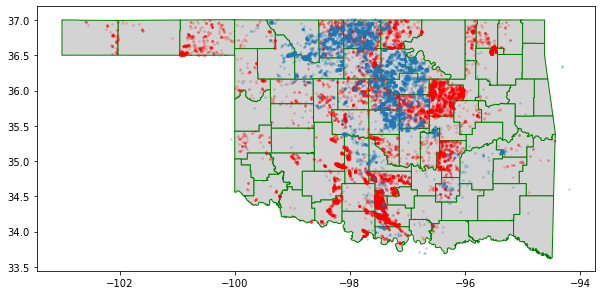

<Figure size 432x288 with 0 Axes>

In [40]:
eq_geo.plot(ax=ax, marker='o',  markersize=3, alpha=.2)
fig

### Faults

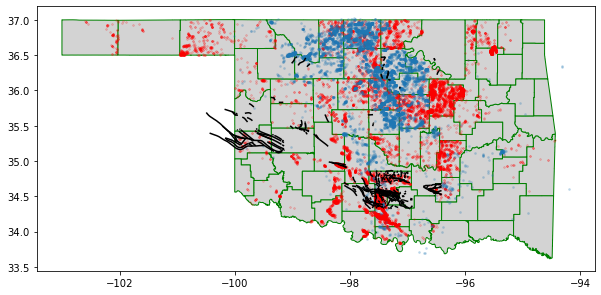

<Figure size 432x288 with 0 Axes>

In [41]:
fault_df.plot(ax=ax, marker='*', color='black', markersize=1)
fig

## Map Visualization With Folium

Folium provides the ability to really easily overlay a zoomable map to your data (could be a street map, terrain, etc.).  It allows multiple layers, as well as heat maps.

In [42]:
import folium
from folium import plugins

### Basic Map

In [43]:
map = folium.Map(location = [35,-98], tiles = "Stamen Terrain", zoom_start = 7)
map

### Layers

This adds two layers of heat maps - one for earthquakes and the other for fracking sites.

In [31]:
# Earthquake Layer
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in eq_geo.geometry ]
plugins.HeatMap(heat_data, min_opacity=.01, blur=1, 
                gradient={0.4: 'lightgray', 0.65: 'grey', 1: 'black'},
                name='Earthquakes').add_to(map)

# Fracking Layer
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in fr_geo.geometry ]
plugins.HeatMap(heat_data, min_opacity=.01, blur=0, 
                gradient={0.1: 'yellow', 0.2: 'orange', .9: 'red'}, 
                name='Fracking Sites').add_to(map)

# Layer control
folium.LayerControl().add_to(map)

map